# CS 435 Final Project
## Cole Schoenbauer, Stephen West, Sam Baeyen

# Installing Dependencies

In [450]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import openpyxl
print('openpyxl: {}'.format(openpyxl.__version__))

import seaborn



Python: 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]
scipy: 1.12.0
numpy: 1.26.4
matplotlib: 3.8.2
pandas: 2.2.0
sklearn: 1.4.0
openpyxl: 3.1.2


# Loading Dataset

In [451]:
from pandas import read_excel

In [452]:
# Loading dataset
path = "crop_data.xlsx"
names = ['Year','Week#','Old Crop CBOT Price','Old Crop Weekly Unadjusted Basis','Old Crop Weekly Adjusted Basis','Old Crop Weekly Cash Price','New Crop CBOT Price','New Crop Weekly Unadjusted Basis','New Crop Weekly Adjusted Basis','New Crop Cash Price','Cash Price Spread','CBOT Price Spread','Canadian Dollar Value','Weekly 10 Year Avg Old Price']
dataset = read_excel(path, names=names)
dataset.head(10)

,Year,Week#,Old Crop CBOT Price,Old Crop Weekly Unadjusted Basis,Old Crop Weekly Adjusted Basis,Old Crop Weekly Cash Price,New Crop CBOT Price,New Crop Weekly Unadjusted Basis,New Crop Weekly Adjusted Basis,New Crop Cash Price,Cash Price Spread,CBOT Price Spread,Canadian Dollar Value,Weekly 10 Year Avg Old Price
1992,2,2.594,-0.0815,-0.467747,2.5125,NaN,NaN,NaN,NaN,NaN,NaN,0.870398,NaN,NaN
1992,3,2.636,-0.0735,-0.476017,2.5625,NaN,NaN,NaN,NaN,NaN,NaN,0.867528,NaN,NaN
1992,4,2.642,-0.0720,-0.488643,2.5700,NaN,NaN,NaN,NaN,NaN,NaN,0.863782,NaN,NaN
1992,5,2.646,0.0815,-0.387107,2.7275,NaN,NaN,NaN,NaN,NaN,NaN,0.849545,NaN,NaN
1992,6,2.624,0.1810,-0.287646,2.8050,NaN,NaN,NaN,NaN,NaN,NaN,0.848464,NaN,NaN
1992,7,2.636,0.1390,-0.348396,2.7750,NaN,NaN,NaN,NaN,NaN,NaN,0.843953,NaN,NaN
1992,8,2.646,0.1890,-0.298922,2.8350,NaN,NaN,NaN,NaN,NaN,NaN,0.844309,NaN,NaN
1992,9,2.672,0.2130,-0.266624,2.8850,NaN,NaN,NaN,NaN,NaN,NaN,0.847817,NaN,NaN
1992,10,2.642,0.2705,-0.233065,2.9125,NaN,NaN,NaN,NaN,NaN,NaN,0.839913,NaN,NaN
1992,11,2.674,0.1435,-0.377128,2.8175,NaN,NaN,NaN,NaN,NaN,NaN,0.837030,NaN,NaN


In [453]:
dataset.tail(10)

,Year,Week#,Old Crop CBOT Price,Old Crop Weekly Unadjusted Basis,Old Crop Weekly Adjusted Basis,Old Crop Weekly Cash Price,New Crop CBOT Price,New Crop Weekly Unadjusted Basis,New Crop Weekly Adjusted Basis,New Crop Cash Price,Cash Price Spread,CBOT Price Spread,Canadian Dollar Value,Weekly 10 Year Avg Old Price
2023,43,4.81,1.02,-0.835217,5.83,5.11,1.01,-0.960927,6.12,-0.29,-0.30,0.721657,NaN,NaN
2023,44,4.77,0.97,-0.776297,5.74,5.18,0.99,-0.906398,6.17,-0.43,-0.41,0.732011,NaN,NaN
2023,45,4.64,0.95,-0.812736,5.59,5.07,1.00,-0.926093,6.07,-0.48,-0.43,0.724690,NaN,NaN
2023,46,4.67,0.94,-0.794438,5.61,5.12,1.00,-0.901568,6.12,-0.51,-0.45,0.729182,NaN,NaN
2023,47,4.64,0.91,-0.765504,5.55,5.11,1.00,-0.845221,6.11,-0.56,-0.47,0.734700,NaN,NaN
2023,48,4.85,0.69,-1.005075,5.54,5.14,0.99,-0.806430,6.13,-0.59,-0.29,0.741015,NaN,NaN
2023,49,4.86,0.71,-1.032310,5.57,5.13,0.99,-0.849105,6.12,-0.55,-0.27,0.736106,NaN,NaN
2023,50,4.83,0.69,-0.937710,5.52,5.13,0.99,-0.738810,6.12,-0.60,-0.30,0.747943,NaN,NaN
2023,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [454]:
# Because we'll be trying to predict old crop prices, we're only working with old crop data
# So we'll only import date information and old crop information

path = "crop_data.xlsx"
names = ['Year','Week#','Old Crop CBOT Price','Old Crop Weekly Unadjusted Basis','Old Crop Weekly Adjusted Basis','Old Crop Weekly Cash Price']
dataset = read_excel(path, names=names, usecols=[0,1,2,3,4,5], header=None)
dataset.head()

,Year,Week#,Old Crop CBOT Price,Old Crop Weekly Unadjusted Basis,Old Crop Weekly Adjusted Basis,Old Crop Weekly Cash Price
0,1992,1,2.526,-0.0785,-0.460684,2.4475
1,1992,2,2.594,-0.0815,-0.467747,2.5125
2,1992,3,2.636,-0.0735,-0.476017,2.5625
3,1992,4,2.642,-0.0720,-0.488643,2.5700
4,1992,5,2.646,0.0815,-0.387107,2.7275


In [455]:
dataset.tail()

,Year,Week#,Old Crop CBOT Price,Old Crop Weekly Unadjusted Basis,Old Crop Weekly Adjusted Basis,Old Crop Weekly Cash Price
1659,2023,48,4.85,0.69,-1.005075,5.54
1660,2023,49,4.86,0.71,-1.032310,5.57
1661,2023,50,4.83,0.69,-0.937710,5.52
1662,2023,51,NaN,NaN,NaN,NaN
1663,2023,52,NaN,NaN,NaN,NaN


In [456]:
# Last two rows contain null data, dropping these rows
# These are the only two rows that contained null data for these fields
# They're completely null too, so we decided to drop them
dataset.drop(axis=0, index=[len(dataset)-2, len(dataset)-1], inplace=True)
dataset.tail()

,Year,Week#,Old Crop CBOT Price,Old Crop Weekly Unadjusted Basis,Old Crop Weekly Adjusted Basis,Old Crop Weekly Cash Price
1657,2023,46,4.67,0.94,-0.794438,5.61
1658,2023,47,4.64,0.91,-0.765504,5.55
1659,2023,48,4.85,0.69,-1.005075,5.54
1660,2023,49,4.86,0.71,-1.032310,5.57
1661,2023,50,4.83,0.69,-0.937710,5.52


In [457]:
# Finding the columns that could have outliers
columns = []
print("Column -", "Value -", "Lower Bound -", "Upper Bound")
for i in range(0, len(dataset.columns)):
    column_sigma = dataset[names[i]].std()
    column_mean = dataset[names[i]].mean()
    for j in range(len(dataset)):
        if dataset.iloc[j,i] > (3*column_sigma)+column_mean or dataset.iloc[j,i] < (-3*column_sigma)+column_mean:
            print(j, dataset.iloc[j,i], (3*column_sigma)+column_mean, (-3*column_sigma)+column_mean)
            columns.append(i)
            break

print("Columns with outliers", columns)

Column - Value - Lower Bound - Upper Bound
237 2.9825 2.646366505957008 -1.3548253908346655
237 1.6980000000000004 0.9361122557095993 -1.3442166355575735
1525 9.06 9.040207366820571 -0.35712794443789786
Columns with outliers [3, 4, 5]


                                      Year     Week#  Old Crop CBOT Price  \
Year                              1.000000 -0.003376             0.633656   
Week#                            -0.003376  1.000000            -0.048836   
Old Crop CBOT Price               0.633656 -0.048836             1.000000   
Old Crop Weekly Unadjusted Basis  0.103707  0.042565            -0.199466   
Old Crop Weekly Adjusted Basis   -0.091807  0.100304            -0.253704   
Old Crop Weekly Cash Price        0.673573 -0.028868             0.909170   

                                  Old Crop Weekly Unadjusted Basis  \
Year                                                      0.103707   
Week#                                                     0.042565   
Old Crop CBOT Price                                      -0.199466   
Old Crop Weekly Unadjusted Basis                          1.000000   
Old Crop Weekly Adjusted Basis                            0.570895   
Old Crop Weekly Cash Price              

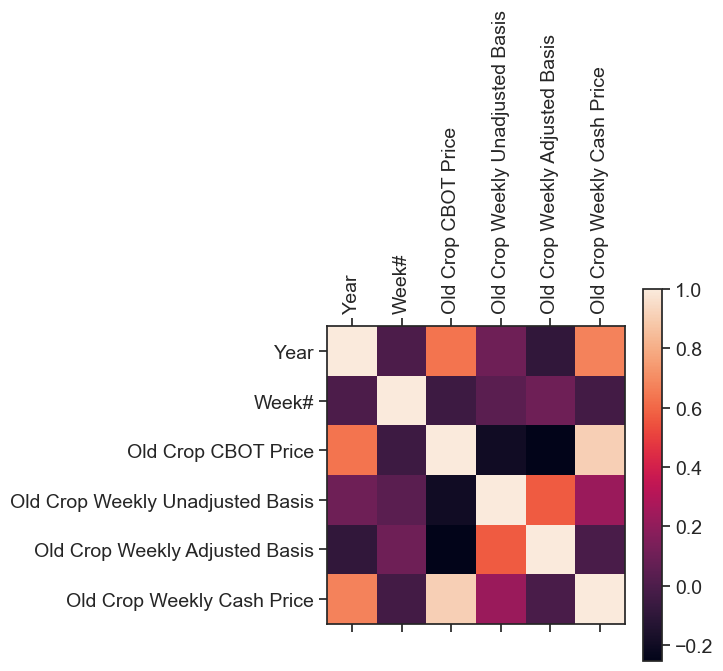

In [458]:
# Checking correlation between variables
from matplotlib import pyplot as plt

plt.matshow(dataset.corr())
print(dataset.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.xticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=14)
plt.show()

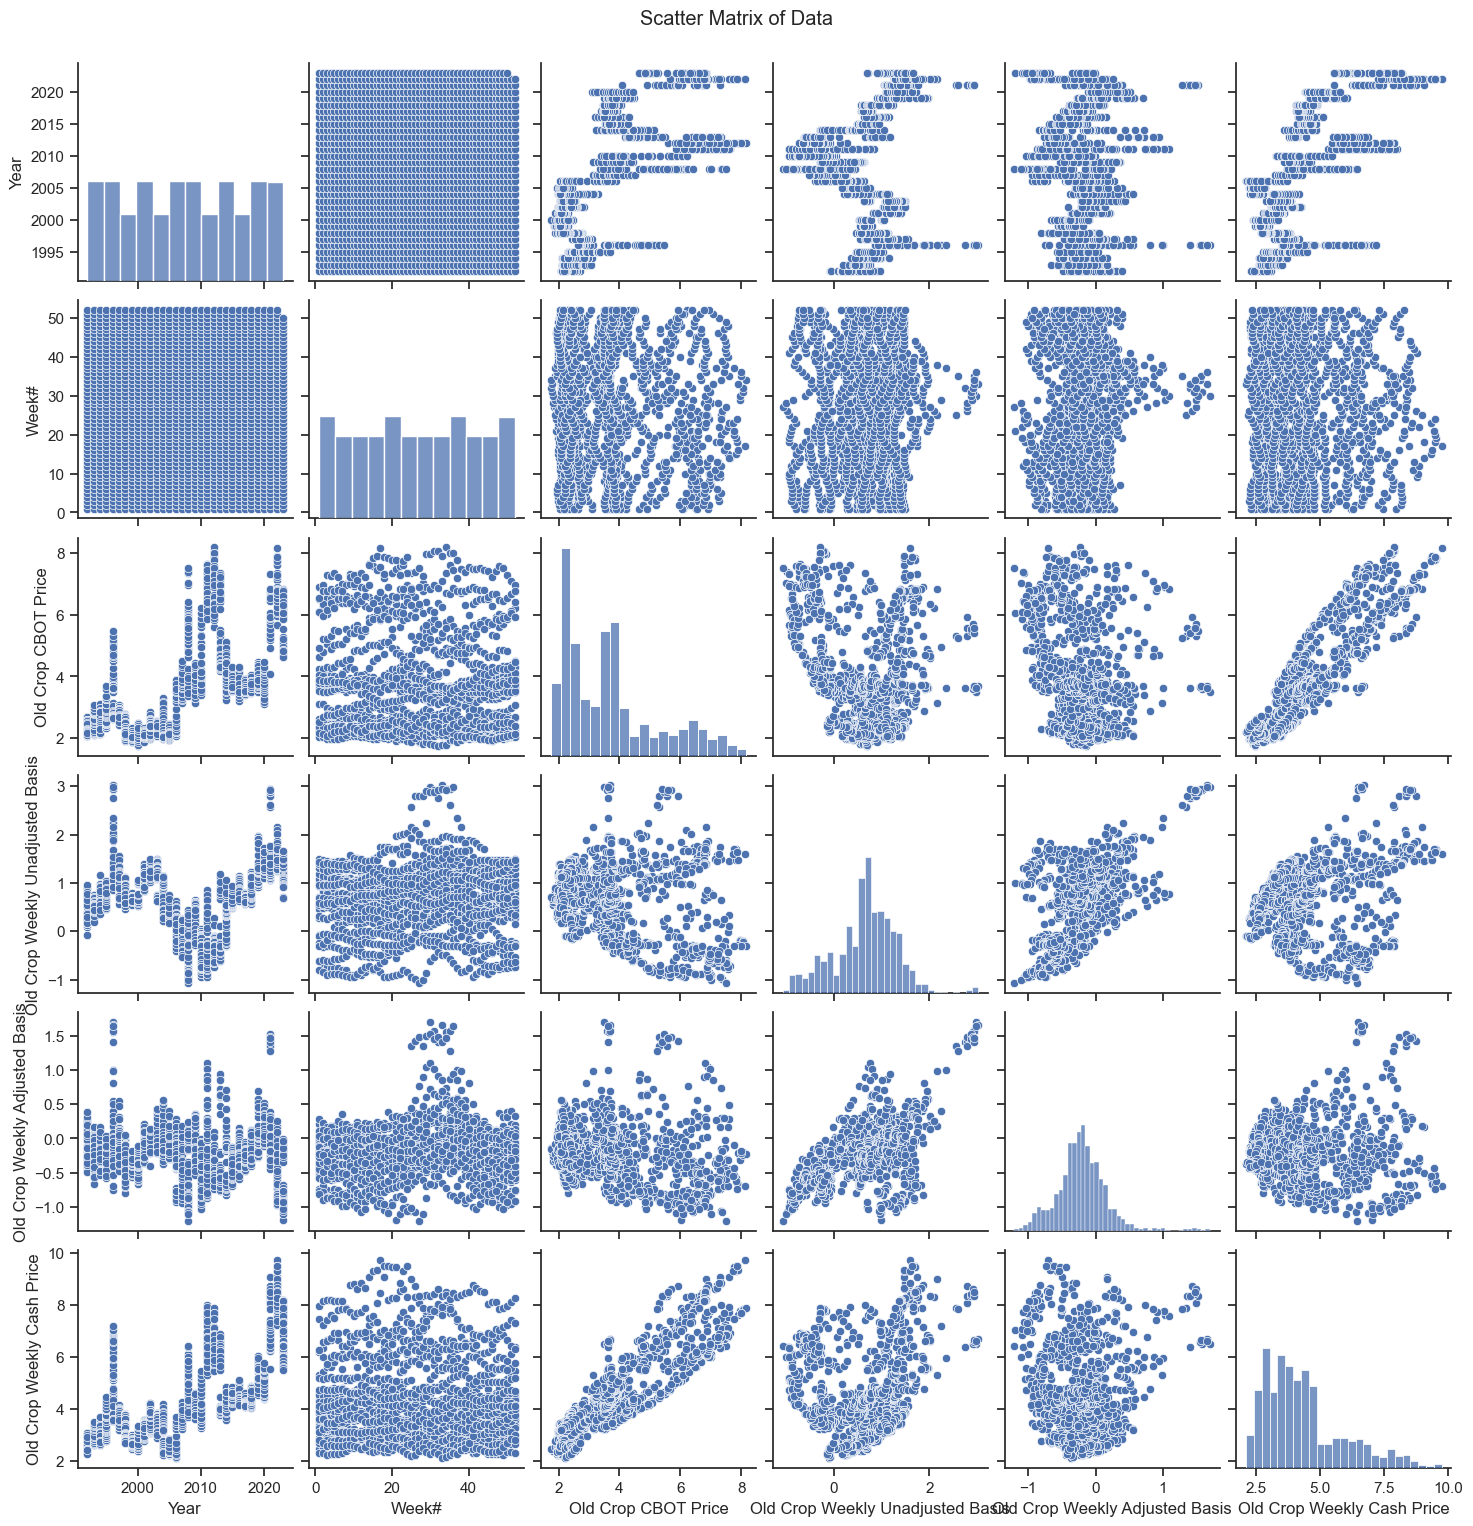

In [459]:
# Scatter matrix of different variables

import seaborn as sns
sns.set_theme(style='ticks')
sns.pairplot(dataset)
plt.suptitle('Scatter Matrix of Data', y=1.02)
plt.show()

# Model Creation

### Linear Regression

In [460]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error

"""
dataset_copy = dataset.copy(deep=True)
dataset_copy.insert(0, "Year-Week", None, True)

for i in range(0, 1):
    for j in range(0, len(dataset_copy)):
        dataset_copy.iloc[j,i] = dataset_copy.iloc[j,i+1] + (dataset_copy.iloc[j,i+2]/52)

print(dataset_copy.head())
"""

array = dataset.values
X = array[:, [0,1,3,4]]
Y = array[:, 2]

reg_model = LinearRegression()
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=.2, random_state=1)

reg_model.fit(X_train, Y_train)

     Year-Week  Year  Week#  Old Crop CBOT Price  \
0  1992.019231  1992      1                2.526   
1  1992.038462  1992      2                2.594   
2  1992.057692  1992      3                2.636   
3  1992.076923  1992      4                2.642   
4  1992.096154  1992      5                2.646   

   Old Crop Weekly Unadjusted Basis  Old Crop Weekly Adjusted Basis  \
0                           -0.0785                       -0.460684   
1                           -0.0815                       -0.467747   
2                           -0.0735                       -0.476017   
3                           -0.0720                       -0.488643   
4                            0.0815                       -0.387107   

   Old Crop Weekly Cash Price  
0                      2.4475  
1                      2.5125  
2                      2.5625  
3                      2.5700  
4                      2.7275  


LinearRegression()

In [461]:
# Prediction results
reg_model_y_predicted = reg_model.predict(X_validation)
reg_rmse = np.sqrt(mean_squared_error(Y_validation, reg_model_y_predicted))
pop_st_dev = Y.std()
print(f"RMSE: {reg_rmse}")

RMSE: 15.054315791345623


In [462]:
print(f"Coefficients: {reg_model.coef_}")
print(f"Intercept: {reg_model.intercept_}")
print(f"R-squared: {1-((reg_rmse**2) / (pop_st_dev**2))}")

Coefficients: [0.05217758]
Intercept: -78.19164424027011
R-squared: -0.008296015794487799


In [463]:
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(reg_model, X_train, Y_train, cv=kfold)
print(cv_results)
print(f"Results: {np.mean(cv_results)} ({np.std(cv_results)})")

[-0.00173593  0.00514036 -0.02522662 -0.00329016  0.00178702 -0.02341553
 -0.01900017 -0.00061128 -0.00101343 -0.00579023]
Results: -0.007315598153184754 (0.01043493754398946)


### Non-linear Regression

In [464]:
from sklearn.preprocessing import PolynomialFeatures

array = dataset.values
X = array[:, [0,1,3,4]]
Y = array[:, 2]

poly_reg_model = LinearRegression()
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=.2, random_state=1)
poly_reg_model.fit(X_train, Y_train)

LinearRegression()

In [465]:

poly_reg_y_predicted = poly_reg_model.predict(X_validation)
poly_reg_rmse = np.sqrt(mean_squared_error(Y_validation, poly_reg_y_predicted))
pop_st_dev = Y.std()
print(f"RMSE: {poly_reg_rmse}")

RMSE: 15.054315791345623


In [466]:
print(f"Coefficients: {poly_reg_model.coef_}")
print(f"Intercept: {poly_reg_model.intercept_}")
print(f"R-squared: {1-((poly_reg_rmse**2) / (pop_st_dev**2))}")

Coefficients: [0.05217758]
Intercept: -78.19164424027011
R-squared: -0.008296015794487799


In [467]:
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(poly_reg_model, X_train, Y_train, cv=kfold)
print(f"Results: {np.mean(cv_results)} ({np.std(cv_results)})")

Results: -0.007315598153184754 (0.01043493754398946)


In [468]:
# looping through degrees 2 through 20
for i in range(3, 21):
    print(f"Degree {i}:")
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X)

    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=.2, random_state=1)
    model = LinearRegression()
    model.fit(X_train, Y_train)

    poly_reg_y_predicted = poly_reg_model.predict(X_validation)
    
    poly_reg_rmse = np.sqrt(mean_squared_error(Y_validation, poly_reg_y_predicted))
    pop_st_dev = Y.std()

    print(f"R-squared: {1-((poly_reg_rmse**2) / (pop_st_dev**2))}")

Degree 3:
R-squared: -0.008296015794487799
Degree 4:
R-squared: -0.008296015794487799
Degree 5:
R-squared: -0.008296015794487799
Degree 6:
R-squared: -0.008296015794487799
Degree 7:
R-squared: -0.008296015794487799
Degree 8:
R-squared: -0.008296015794487799
Degree 9:
R-squared: -0.008296015794487799
Degree 10:
R-squared: -0.008296015794487799
Degree 11:
R-squared: -0.008296015794487799
Degree 12:
R-squared: -0.008296015794487799
Degree 13:
R-squared: -0.008296015794487799
Degree 14:
R-squared: -0.008296015794487799
Degree 15:
R-squared: -0.008296015794487799
Degree 16:
R-squared: -0.008296015794487799
Degree 17:
R-squared: -0.008296015794487799
Degree 18:
R-squared: -0.008296015794487799
Degree 19:
R-squared: -0.008296015794487799
Degree 20:
R-squared: -0.008296015794487799
